# SMS Spam Filtering Using Machine Learning

In [1]:
import numpy as np
import pandas as pd

## Importing Dataset

In [2]:
sms=pd.read_csv('https://raw.githubusercontent.com/Sudarshana-Chakravarthy/SMS-Spam-Filtering/main/spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Pre-Processing

In [3]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms.rename(columns = {'v1':'label','v2':'message'},inplace=True)
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

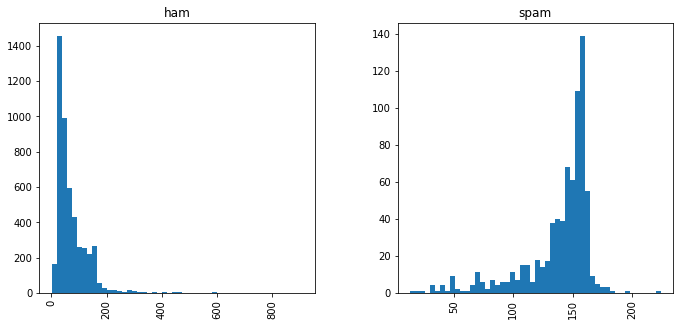

In [6]:
import matplotlib.pyplot as plt
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

([<matplotlib.patches.Wedge at 0x1470e3d3c10>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'Ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'Spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

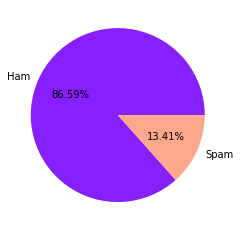

In [7]:
plt.pie(sms.label.value_counts(),labels=['Ham','Spam'],colors=["#871fff","#ffa78c"],autopct='%1.2f%%')

In [8]:
sms['label'] = sms['label'].map( {'spam': 1, 'ham': 0})

In [9]:
# Replace email address with 'emailaddress'
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
sms['message'] = sms['message'].str.replace(r'£|\$', 'money-symbol')

# Replace 10 digit phone number with 'phone-number'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# Replace normal number with 'number'
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
sms['message'] = sms['message'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
sms['message'] = sms['message'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
sms['message'] = sms['message'].str.lower()

<ipython-input-9-4f29afaa942d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
<ipython-input-9-4f29afaa942d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
<ipython-input-9-4f29afaa942d>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  sms['message'] = sms['message'].str.replace(r'£|\$', 'money-symbol')
<ipython-input-9-4f29afaa942d>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')
<ipython-input-9-4f29afaa942d>:14: FutureWarning: The default value of regex will change from True to Fal

### Importing NLTK

In [10]:
import nltk
from nltk.corpus import stopwords

## Removing Stopwords

In [11]:
stop_words = set(stopwords.words('english'))
sms['message'] = sms['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

## Stemming

In [12]:
ss = nltk.SnowballStemmer("english")
sms['message'] = sms['message'].apply(lambda x: ' '.join(ss.stem(term) for term in x.split()))

## Tokenization

In [13]:
sms_df = sms['message']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
     
all_words = nltk.FreqDist(all_words)

In [14]:
print('Number of words: {}'.format(len(all_words)))

Number of words: 6526


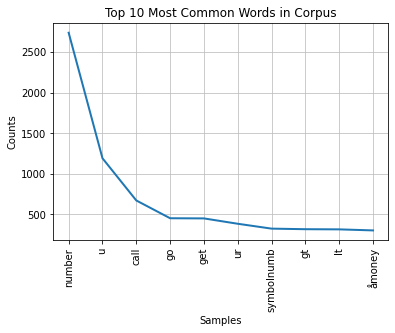

<AxesSubplot:title={'center':'Top 10 Most Common Words in Corpus'}, xlabel='Samples', ylabel='Counts'>

In [15]:
all_words.plot(10, title='Top 10 Most Common Words in Corpus');


## Representation

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(sms_df)
import pickle
#serializing our model to a file called model.pkl
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,6496,6497,6498,6499,6500,6501,6502,6503,6504,6505
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
